<a href="https://colab.research.google.com/github/BMesc/cafe/blob/master/KNN_n_MLP_Caf%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

uri = "https://raw.githubusercontent.com/BMesc/cafe/master/data.csv"

graos = pd.read_csv(uri)

graos.head()

,Area,Roundness,R,G,B
0,1686.5,0.860310,146.814374,91.722222,78.931217
1,1582.5,0.867122,154.086069,99.466282,87.618456
2,1476.0,0.875663,153.118258,95.830282,81.781296
3,1576.5,0.856058,148.290476,91.926190,80.050952
4,1462.5,0.870554,143.559487,85.235897,73.726667


In [ ]:
x=graos[['Area', 'Roundness', 'R', 'G', 'B']].values.tolist()

In [ ]:
y = ([0]*88) + ([1]*41) + ([2]*14) + ([3]*19) #the target values for comparison

In [ ]:
graos['Class'] = y

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)
X_train =  scale(X_train)
X_test = scale(X_test)
x = scale(x)

# **Train Test Split (holdout)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
treino = neigh.fit(X_train, y_train)

In [ ]:
pred = neigh.predict(X_test)

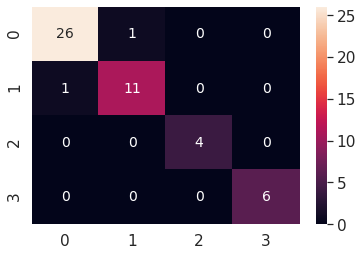

In [ ]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, pred)
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 14}) # font size

plt.show()

In [ ]:
neigh.score(X_test, y_test)

0.9591836734693877

# **Cross Validation k-fold = 5**

In [ ]:
from sklearn.model_selection import cross_val_score
#creating a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, x, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.90909091 1.         1.         0.90625    0.84375   ]
cv_scores mean:0.9318181818181819


 **Leave One out**

In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn import model_selection
loocv = model_selection.LeaveOneOut()
results_loocv = model_selection.cross_val_score(neigh, x, y, cv=loocv)
print("Acurácia: %.2f%%" % (results_loocv.mean()*100.0))

Acurácia: 93.21%


#Using **MLP**

In [ ]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier( alpha=1e-5, hidden_layer_sizes=(6, 6), random_state=1, max_iter=2000)
treino5 = clf_mlp.fit(X_train, y_train)

In [ ]:
predmlp = clf_mlp.predict(X_test)

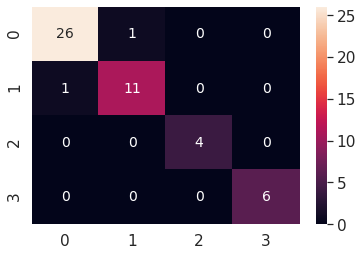

In [ ]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, predmlp)
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 14}) # font size

plt.show()

In [ ]:
clf_mlp.score(X_test,y_test)

0.9591836734693877

**K-Fold - Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
#train model with cv of 5 
cv_scores = cross_val_score(clf_mlp, x, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.96969697 1.         0.96875    0.96875    0.875     ]
cv_scores mean:0.9564393939393939


**Leave one out**

In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn import model_selection
loocv = model_selection.LeaveOneOut()
results_loocv = model_selection.cross_val_score(clf_mlp, x, y, cv=loocv)
print("Acurácia: %.2f%%" % (results_loocv.mean()*100.0))

Acurácia: 96.91%
